<a href="https://colab.research.google.com/github/code-freeze/keras_machineLearning/blob/master/Titanic_Sol_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import zipfile

In [0]:
zipfile.ZipFile('titanic.zip').extractall()

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

Data Dictionary


SibSp                   : sibling or spouse aboard titanic
parch                   : parents or children aboard titanic
Embarkment      : place of boarding **bold text**


In [0]:
train.shape

(891, 12)

In [0]:
test.shape

(418, 11)

**Visualizaton using matplotlib**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [0]:
def bar(feature):
  survive=train[train['Survived']==1][feature].value_counts()
  dead=train[train['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survive,dead])
  print(df)
  df.index=['Survive','Dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

            S   C   Q
Embarked  217  93  30
Embarked  427  75  47


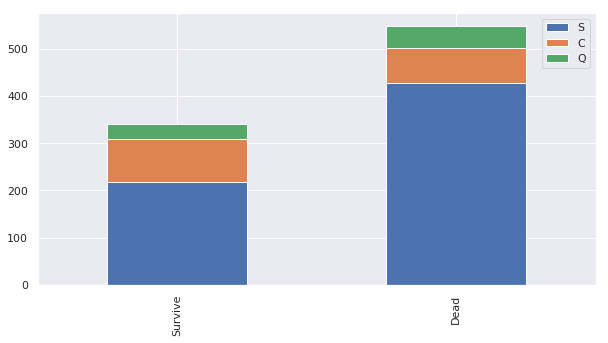

In [0]:
bar('Embarked')

In [0]:
cols=['Ticket']
train=train.drop(cols,axis=1)
test=test.drop(cols,axis=1)


In [0]:
train.shape

(891, 11)

In [0]:
test.shape

(418, 10)

In [0]:
train_test_dataSet=[train,test]

In [0]:
i=0
for dataset in train_test_dataSet:
  dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
  i=len(dataset)
  print(i)
test['Title'].value_counts()

891
418


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [0]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,"Mme":3,"Lady":3,"Ms":3,
              "Capt":3,"Don":3,"Jonkheer":3,"Sir":3,"Countless":3,"Dona":3}

In [0]:
 for dataset in train_test_dataSet:
    dataset['Title']=dataset['Title'].map(title_mapping) 

In [0]:
# bar('Title')

In [0]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [0]:
for dataset in train_test_dataSet:
  dataset.loc[dataset['Age']<=16, 'Age']=0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age' ]=1
  dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age' ]=2
  dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age' ]=3
  dataset.loc[dataset['Age']> 62,'Age']=4

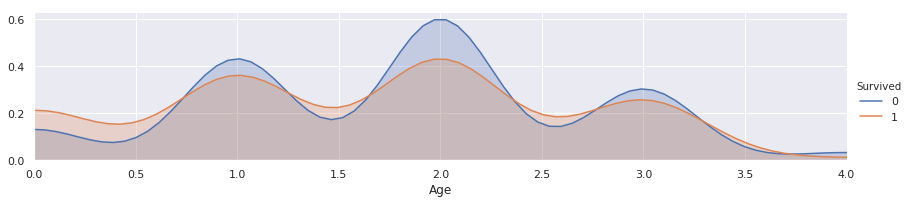

In [0]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

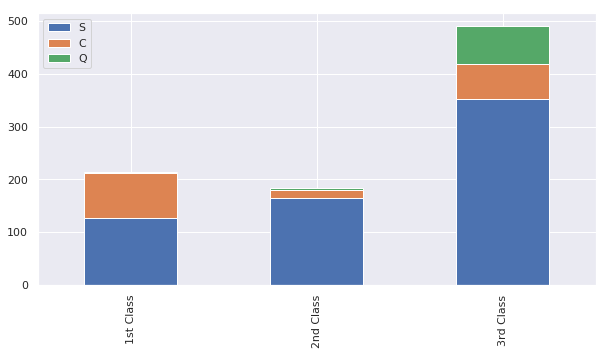

In [0]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [0]:
for dataset in train_test_dataSet:
  dataset['Embarked']=dataset['Embarked'].fillna('S')

embark_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_dataSet:
  dataset['Embarked']=dataset['Embarked'].map(embark_mapping)

In [0]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"),inplace=True)

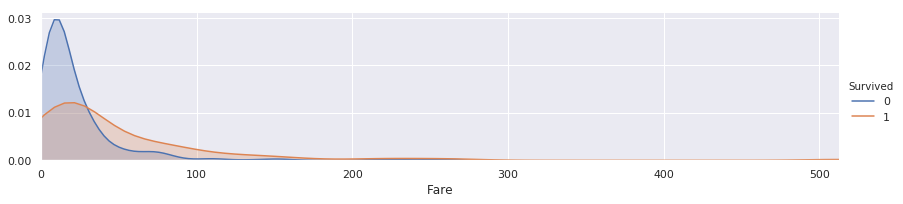

In [0]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

In [0]:
for dataset in train_test_dataSet:
  dataset.loc[dataset['Fare']<=17,'Fare']=0
  dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30) ,'Fare']=1
  dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2
  dataset.loc[dataset['Fare']>100,'Fare']=3

In [0]:
for dataset in train_test_dataSet:
  dataset['Cabin']=dataset['Cabin'].str[:1]

In [0]:
PClass1=train[train['Pclass']==1]['Cabin'].value_counts()
PClass2=train[train['Pclass']==2]['Cabin'].value_counts()
PClass3=train[train['Pclass']==3]['Cabin'].value_counts()
PClass3

F    5
G    4
E    3
Name: Cabin, dtype: int64

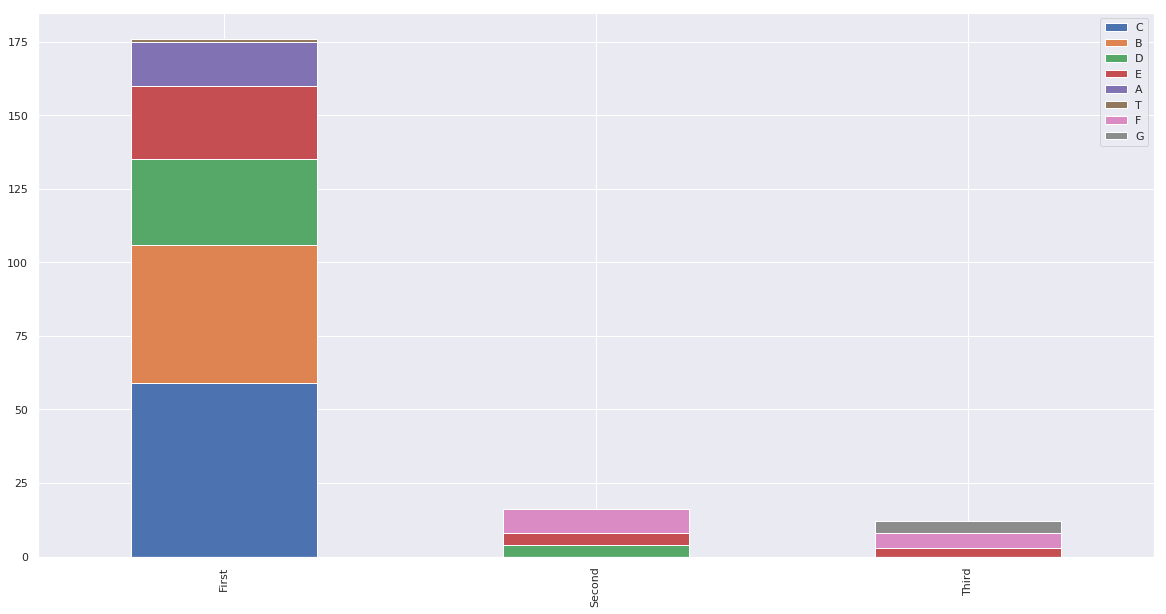

In [0]:
df=pd.DataFrame([PClass1,PClass2,PClass3])
df.index=['First','Second','Third']
df.plot(kind='bar',stacked=True,figsize=(20,10)) 

In [0]:
cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}

In [0]:
for dataset in train_test_dataSet:
  dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [0]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [0]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

In [0]:
# facet=sns.FacetGrid(train,hue='Survived',aspect=4)
# facet.map(sns.kdeplot,'FamilySize',shade=True)
# facet.set(xlim=(0,train['FamilySize'].max()))
# facet.add_legend()
# plt.xlim()

In [0]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
sex_mapping={"male":0,"female":1}

In [0]:
for dataset in train_test_dataSet:
  dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)
  dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [0]:
drop_set=['Parch','SibSp','Name']
train=train.drop(drop_set,axis=1)
test=test.drop(drop_set,axis=1)
train=train.drop('PassengerId',axis=1)

In [0]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']
train_data.head()
target.head()
test_data=test.drop('PassengerId',axis=1)

**MODELLING**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import SVC

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold=KFold(n_splits=50,shuffle=True,random_state=1)

**kNN method for classifcation**

In [0]:
clf=KNeighborsClassifier(n_neighbors=13)
knn_score=cross_val_score(clf,train_data,target,scoring='accuracy',cv=kfold,n_jobs=1)
knn_score=round(np.mean(knn_score)*100,2)

**Decision Tree**

In [0]:
tree_clf=DecisionTreeClassifier()
tree_score=cross_val_score(tree_clf,train_data,target,scoring='accuracy',cv=kfold,n_jobs=1)
tree_score=round(np.mean(tree_score)*100,2)

**Random Forest**

In [0]:
r_forest_clf=RandomForestClassifier(n_estimators=13)
r_forest_score=cross_val_score(r_forest_clf,train_data,target,scoring='accuracy',cv=kfold,n_jobs=1)
r_forest_score=round(np.mean(r_forest_score)*100,2)

**Naive Baye**s

In [0]:
n_bayes_clf=GaussianNB()
n_bayes_score=cross_val_score(n_bayes_clf,train_data,target,scoring='accuracy',cv=kfold,n_jobs=1)
n_bayes_score=round(np.mean(n_bayes_score)*100,2)

**SVM**

In [0]:
svm_clf=SVC(gamma='scale')
svm_score=cross_val_score(svm_clf,train_data,target,scoring='accuracy',cv=kfold,n_jobs=1,verbose=True)
svm_score=round(np.mean(svm_score)*100,2)
svm_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s finished


83.51

**TESTING**

In [0]:
svm_clf.fit(train_data,target)
prediction=svm_clf.predict(test_data)

In [0]:
submission=pd.DataFrame({ "PassengerId":  test['PassengerId'],"Survived": prediction})
submission.to_csv('titanic_submission.csv',index=False)